# **ANOVA (Analysis of Variance)**

ANOVA (Analysis of Variance) is a statistical method used to analyze differences between group means and determine whether any of the group means are statistically significantly different from each other. It is essentially used to test if there is a significant variation between multiple groups based on one or more factors.

ANOVA is commonly used when comparing three or more groups or conditions. It is an extension of the t-test, which is used when comparing only two groups.

**Why Use ANOVA?**

- **Compare Means of 2 Groups:** Test if group means differ.

- **Check Variability:** Determine if differences are due to the factor or random noise.

- **Avoid Multiple Tests:** Handles multiple comparisons in one test.

**When to Use ANOVA?**

- **2 Groups:** Comparing three or more groups.

- **Compare Means:** Based on one or more factors.

- **Continuous Data:** Assumes normal distribution.

- **Independent Groups:** Different subjects in each group.

- **Equal Variances:** Assumes similar variances across groups.

**Types of ANOVA**
- **One-Way:** Tests one factor.

- **Two-Way:** Tests two factors.

- **Repeated Measures:** For repeated measurements on the same subjects.

## Dataset

### Generating Dataset Code

In [36]:
import pandas as pd
import numpy as np

# Step 1: Generate the dataset
np.random.seed(42)

# Create data for three teaching methods (Method A, Method B, Method C)
method_a = np.random.normal(loc=75, scale=10, size=30)  # Mean=75, Std=10, n=30
method_b = np.random.normal(loc=80, scale=12, size=30)  # Mean=80, Std=12, n=30
method_c = np.random.normal(loc=85, scale=8, size=30)   # Mean=85, Std=8, n=30

# Create additional data for a factor (e.g., gender: Male, Female) for Two-Way ANOVA
gender = ['Male'] * 15 + ['Female'] * 15

# Combine into a DataFrame
data = pd.DataFrame({
    'score': np.concatenate([method_a, method_b, method_c]),
    'method': ['Method A'] * 30 + ['Method B'] * 30 + ['Method C'] * 30,
    'gender': gender * 3
})

data.to_csv('C:/Github Repository/Advanced-Statistical-Methods-for-AB-and-Hypothesis-Testing-Methods-of-Experimentations/datasets/ANOVA/teaching_methods.csv', index=False)


### Loading Dataset

In [37]:
import pandas as pd

data = pd.read_csv('C:/Github Repository/Advanced-Statistical-Methods-for-AB-and-Hypothesis-Testing-Methods-of-Experimentations/datasets/ANOVA/teaching_methods.csv')

In [38]:
data.head()

,score,method,gender
0,79.967142,Method A,Male
1,73.617357,Method A,Male
2,81.476885,Method A,Male
3,90.230299,Method A,Male
4,72.658466,Method A,Male


### Data summary

**Size:** 90 rows

**Columns:**

- **score:** Continuous variable representing exam scores.

- **method:** Categorical variable representing the teaching method used (Method A, Method B, Method C).

- **gender:** Categorical variable representing the gender of the students (Male, Female).

**Groups:**

- **Teaching Methods:** 3 categories (Method A, Method B, Method C).

- **Gender:** 2 categories (Male, Female).

- **Scores:** Exam scores are generated randomly with different means and standard deviations for each method:

**Method A: Mean = 75, Std = 10**

**Method B: Mean = 80, Std = 12**

**Method C: Mean = 85, Std = 8**

## Shapiro-Wilk Test (Normality Check)

In [39]:
print("Shapiro-Wilk Test Results:")
print()
for method in ['Method A', 'Method B', 'Method C']:
    group_data = data[data['method'] == method]['score']
    stat, p_value = stats.shapiro(group_data)
    print(f"{method}: W-statistic={stat:.4f}, p-value={p_value:.4f}")
    if p_value < 0.05:
        print(f"{method}: The data is not normally distributed.")
        print()
    else:
        print(f"{method}: The data is normally distributed.")
        print()

Shapiro-Wilk Test Results:

Method A: W-statistic=0.9751, p-value=0.6868
Method A: The data is normally distributed.

Method B: W-statistic=0.9837, p-value=0.9130
Method B: The data is normally distributed.

Method C: W-statistic=0.9628, p-value=0.3654
Method C: The data is normally distributed.



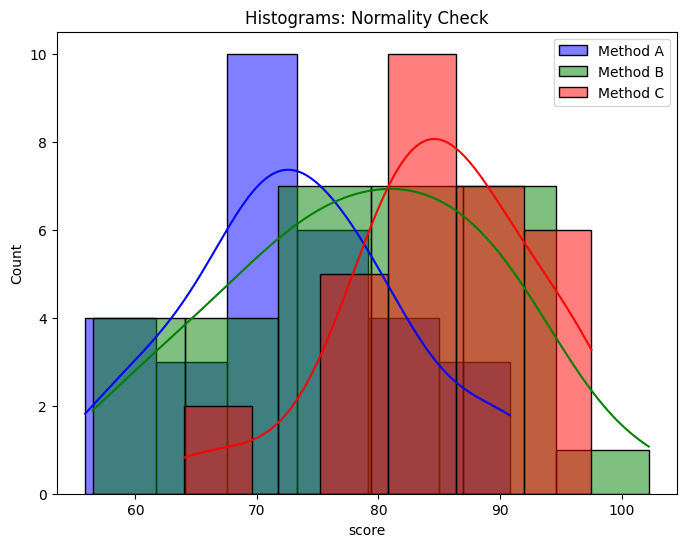

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(data[data['method'] == 'Method A']['score'], kde=True, color='blue', label='Method A')
sns.histplot(data[data['method'] == 'Method B']['score'], kde=True, color='green', label='Method B')
sns.histplot(data[data['method'] == 'Method C']['score'], kde=True, color='red', label='Method C')
plt.title('Histograms: Normality Check')
plt.legend()
plt.show()

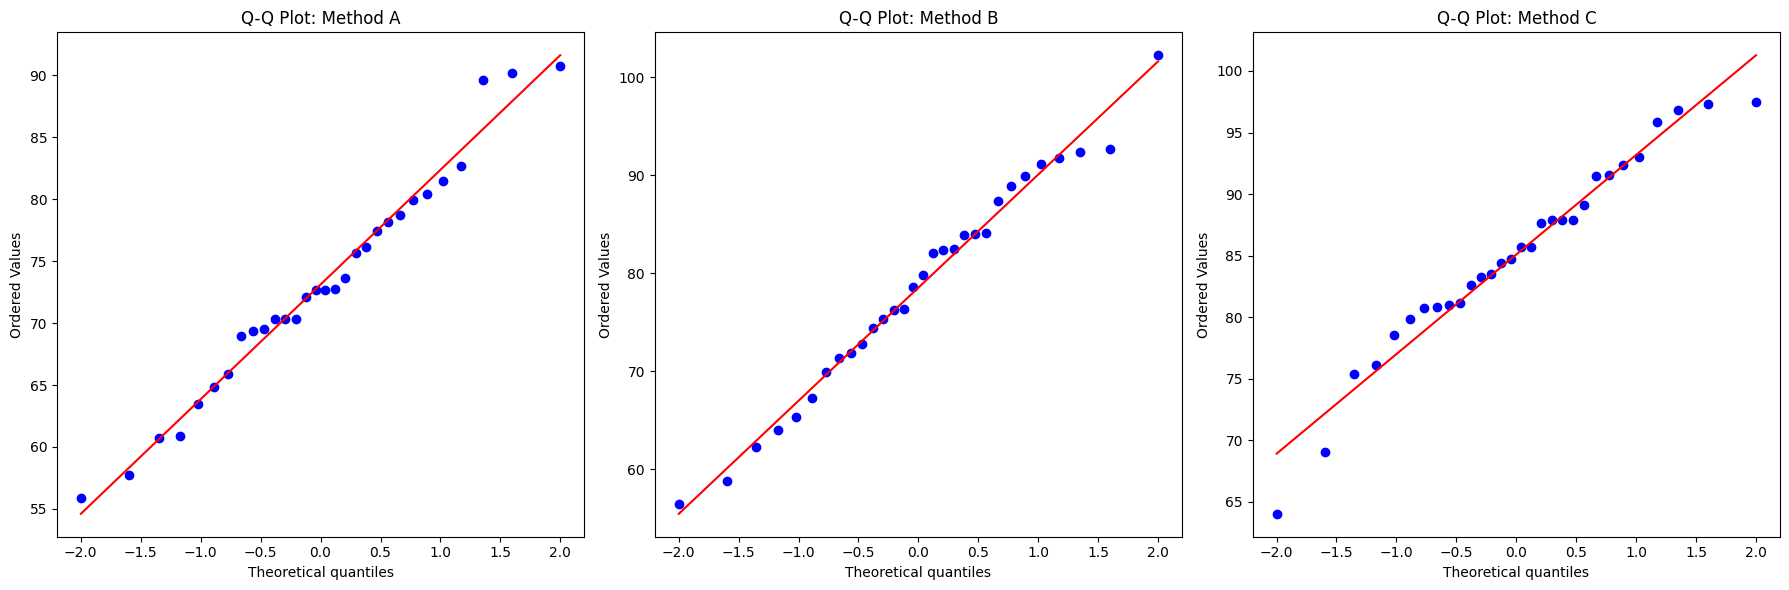

In [51]:
import scipy.stats as stats
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))


stats.probplot(data[data['method'] == 'Method A']['score'], dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot: Method A')

stats.probplot(data[data['method'] == 'Method B']['score'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot: Method B')

stats.probplot(data[data['method'] == 'Method C']['score'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot: Method C')

plt.tight_layout()
plt.show()

## Levene’s Test (Equality of Variances)

In [ ]:
stat, p_value = stats.levene(method_a, method_b, method_c)
print(f"Levene's Test: W-statistic={stat:.4f}, p-value={p_value:.4f}")
if p_value < 0.05:
    print("Levene's Test: The variances are not equal across groups.")
else:
    print("Levene's Test: The variances are equal across groups.")


Levene's Test: W-statistic=2.3198, p-value=0.1043
Levene's Test: The variances are equal across groups.


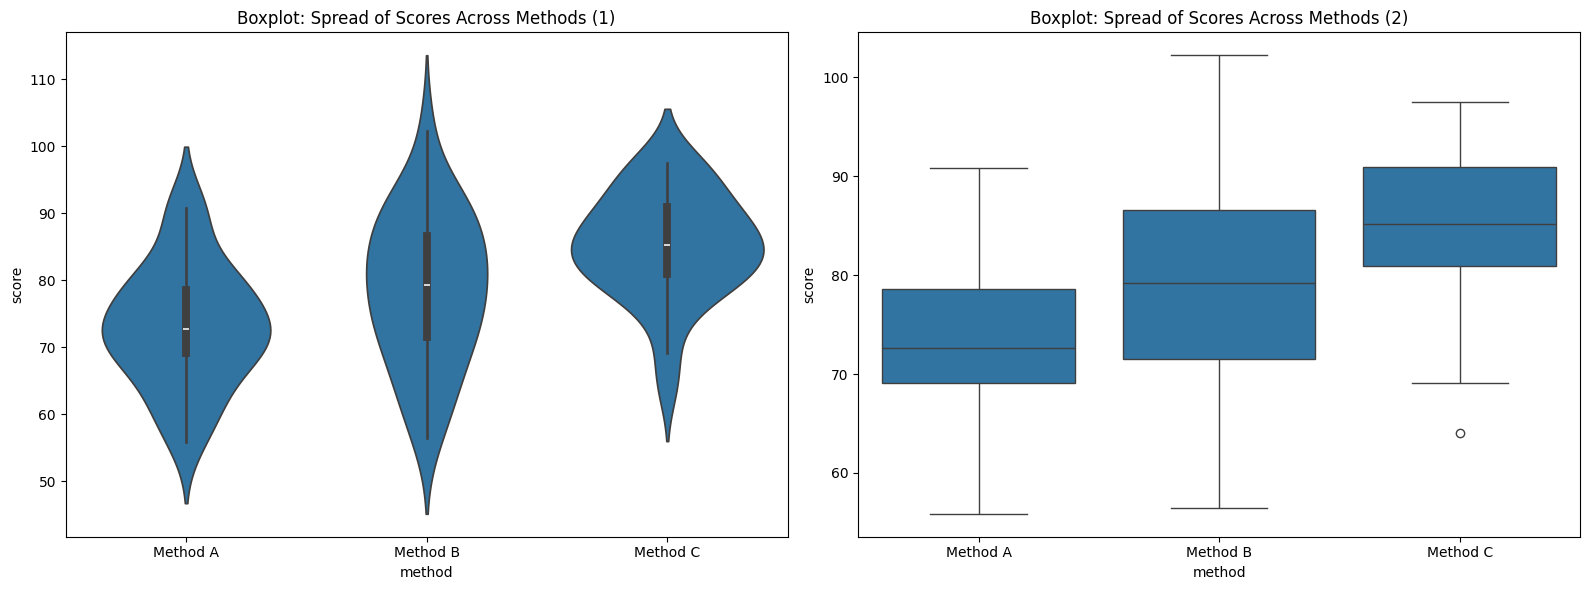

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.violinplot(x='method', y='score', data=data, ax=axes[0])
axes[0].set_title("Boxplot: Spread of Scores Across Methods (1)")

sns.boxplot(x='method', y='score', data=data, ax=axes[1])
axes[1].set_title("Boxplot: Spread of Scores Across Methods (2)")

plt.tight_layout()
plt.show()


## Independent T-test (comparing Method A vs. Method B vs. Method C)

In [57]:
t_stat, p_value = stats.ttest_ind(method_a, method_b)
print(f"Independent T-Test (Method A vs Method B): t-statistic={t_stat:.4f}, p-value={p_value:.4f}")
if p_value < 0.05:
    print("The means of Method A and Method B are significantly different.")
else:
    print("The means of Method A and Method B are not significantly different.")

Independent T-Test (Method A vs Method B): t-statistic=-2.0720, p-value=0.0427
The means of Method A and Method B are significantly different.


In [58]:
t_stat, p_value = stats.ttest_ind(method_b, method_c)
print(f"Independent T-Test (Method B vs Method C): t-statistic={t_stat:.4f}, p-value={p_value:.4f}")
if p_value < 0.05:
    print("The means of Method B and Method C are significantly different.")
else:
    print("The means of Method B and Method C are not significantly different.")

Independent T-Test (Method B vs Method C): t-statistic=-2.6206, p-value=0.0112
The means of Method B and Method C are significantly different.


In [59]:
t_stat, p_value = stats.ttest_ind(method_a, method_c)
print(f"Independent T-Test (Method A vs Method C): t-statistic={t_stat:.4f}, p-value={p_value:.4f}")
if p_value < 0.05:
    print("The means of Method A and Method C are significantly different.")
else:
    print("The means of Method A and Method C are not significantly different.")

Independent T-Test (Method A vs Method C): t-statistic=-5.4706, p-value=0.0000
The means of Method A and Method C are significantly different.


## ANOVA (Analysis of Variance)

### One-Way ANOVA (comparing all three methods)

In [60]:
f_statistic, p_value = stats.f_oneway(method_a, method_b, method_c)
print(f"One-Way ANOVA (Method A, B, C): F-statistic={f_statistic:.4f}, p-value={p_value:.4f}")
if p_value < 0.05:
    print("One-Way ANOVA: There is a significant difference between the methods.")
else:
    print("One-Way ANOVA: There is no significant difference between the methods.")

One-Way ANOVA (Method A, B, C): F-statistic=12.0572, p-value=0.0000
One-Way ANOVA: There is a significant difference between the methods.


**The One-Way ANOVA test revealed a significant difference between the means of the three teaching methods (Method A, Method B, and Method C).This suggests that at least one of the teaching methods leads to significantly different student scores compared to the others.**